# Basic Initialization

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
import graphviz

In [34]:
# This cell is for fetcching dataset from UC Irvine
# 11 features, with a numerical target attribute (1-10). One additional color attribute (red/white)
# 4898 raw data points

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features # Doesn't include color
y = wine_quality.data.targets 

# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 

# print(X)

# Creating a combined df for analysis
combined_df = pd.concat([X, y], axis=1)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

# Data Preprocessing

In [35]:
# No null values are found accross the dataset, so we can move forward with the raw dataset
print(X.isnull().sum())


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


In [36]:
X.dtypes
# y.dtypes
# y only has target attribute ['quality'] in int64

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

In [37]:
X.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [38]:
y.describe()

,quality
count,6497.000000
mean,5.818378
std,0.873255
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,9.000000


### Data Preprocessing - Standardization and Normalization
Dataset is already standardized and normalized, so this code is redundant

In [39]:
# # standardize and normalize the features
# from sklearn.preprocessing import StandardScaler
# std_scaler = StandardScaler()

# y_scaled = y

# X_scaled = std_scaler.fit_transform(X)

# X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
# X_scaled.head()


# # Creating a combined df for analysis
# combined_df_scaled = pd.concat([X, y], axis=1)

# Dataset Analysis

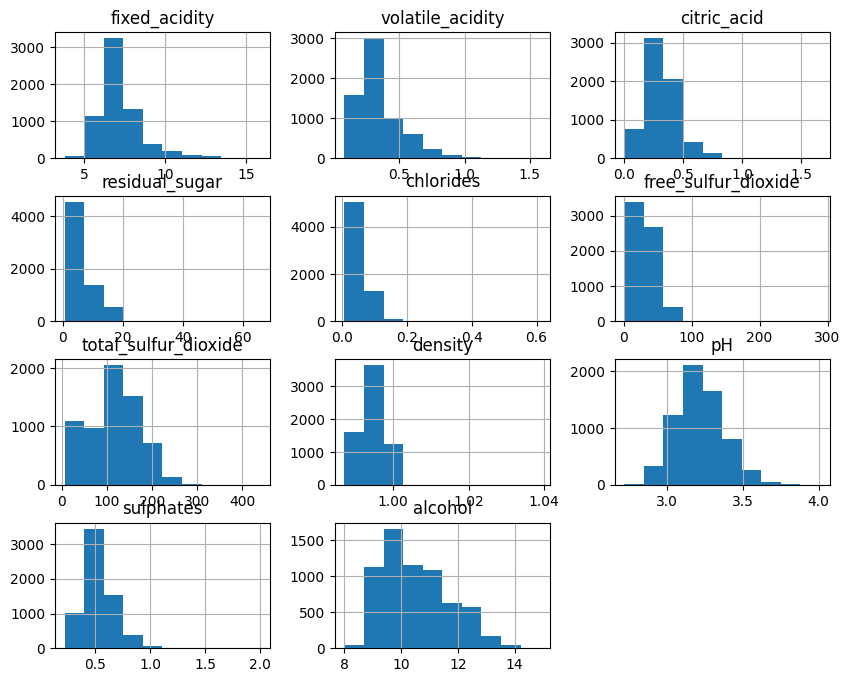

In [40]:
X.hist(figsize=(10, 8), bins=10)
plt.show()

<Axes: >

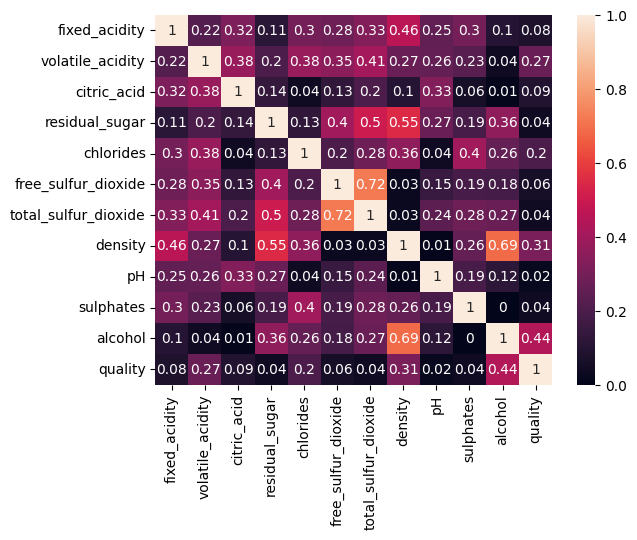

In [41]:
# Correlation Analysis

# find correlation between features and label using correlation matrix
corr_matrix = combined_df.corr().round(2).abs()

# display corr matrix as heatmap to visual better
sns.heatmap(data=corr_matrix, annot=True)

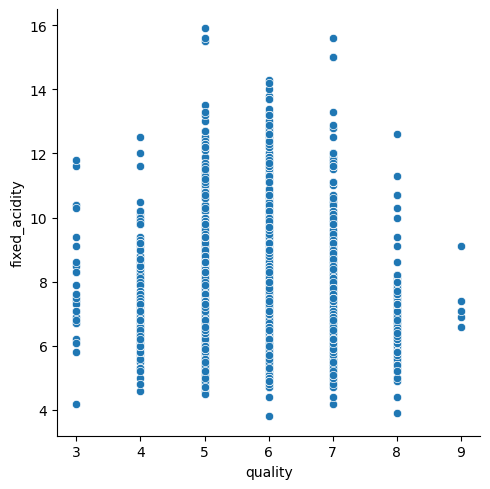

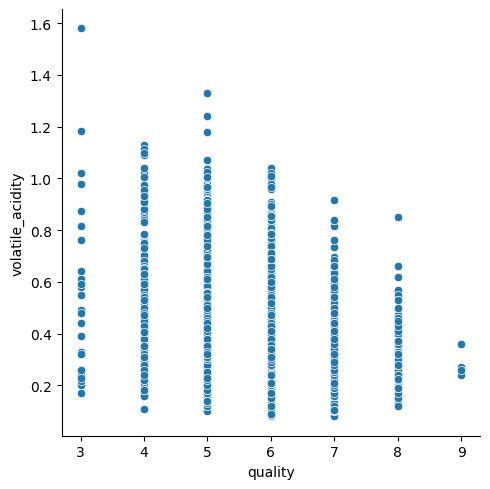

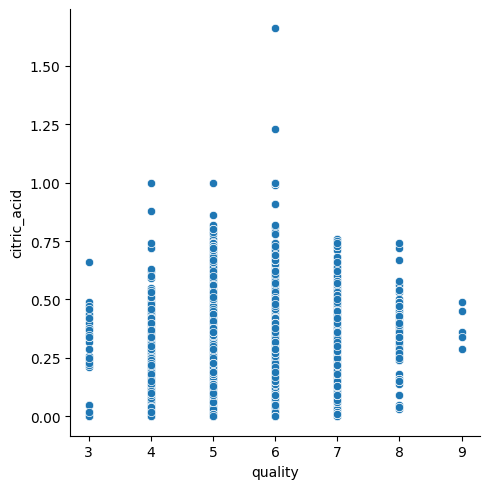

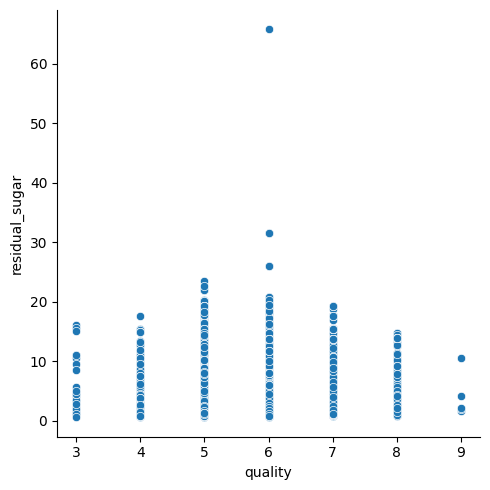

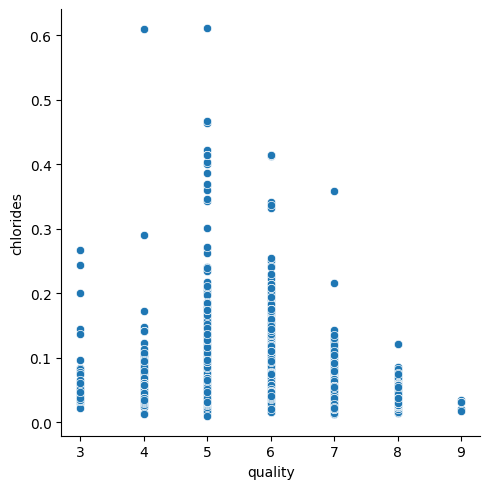

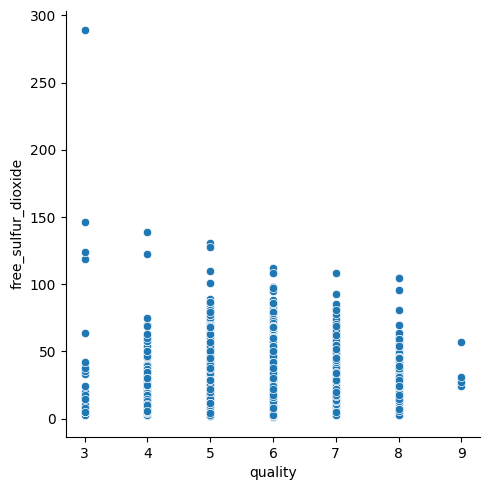

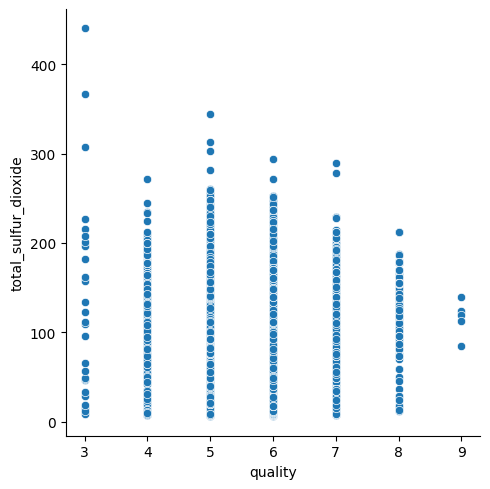

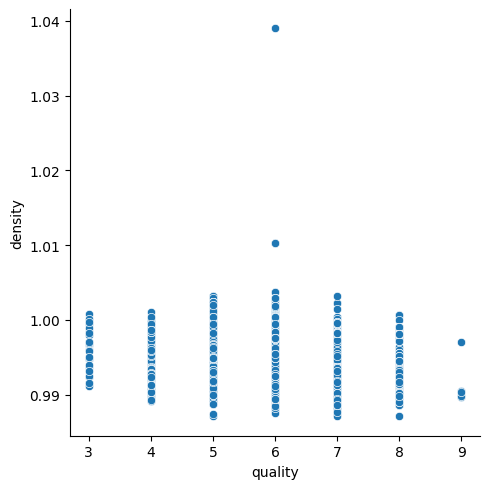

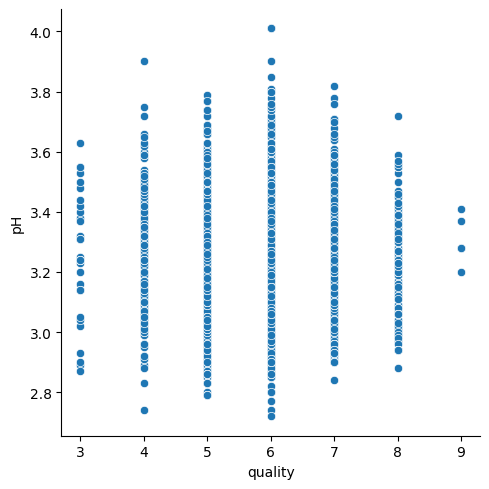

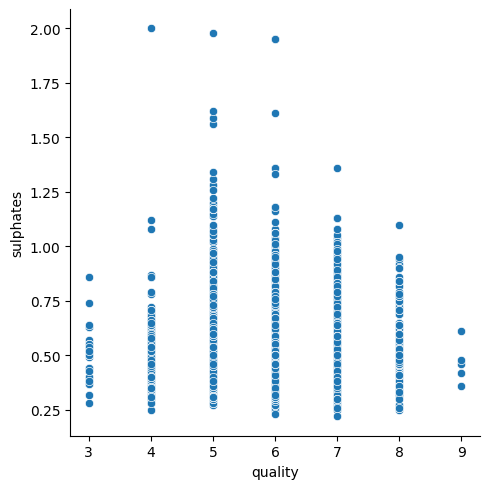

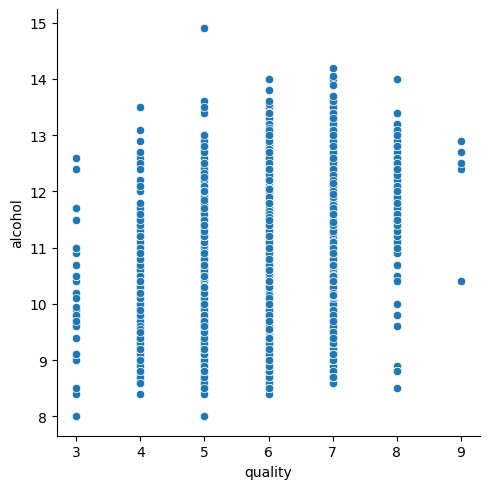

In [47]:
sns.relplot(data=combined_df, x="quality", y="fixed_acidity")
sns.relplot(data=combined_df, x="quality", y="volatile_acidity")
sns.relplot(data=combined_df, x="quality", y="citric_acid")
sns.relplot(data=combined_df, x="quality", y="residual_sugar")
sns.relplot(data=combined_df, x="quality", y="chlorides")
sns.relplot(data=combined_df, x="quality", y="free_sulfur_dioxide")
sns.relplot(data=combined_df, x="quality", y="total_sulfur_dioxide")
sns.relplot(data=combined_df, x="quality", y="density")
sns.relplot(data=combined_df, x="quality", y="pH")
sns.relplot(data=combined_df, x="quality", y="sulphates")
sns.relplot(data=combined_df, x="quality", y="alcohol")
